### Bibliotekos

In [105]:
import pandas as pd
import numpy as np
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx

### Duomenų importavimas

In [106]:
data = pd.read_csv('./filtered-df.csv', parse_dates=['# Timestamp'])

### Rinkinio peržiūra

In [121]:
data = data.sort_values(['MMSI', '# Timestamp'])

In [122]:
data.info()

<class 'pandas.DataFrame'>
Index: 1654532 entries, 268987 to 1654471
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   # Timestamp  1654532 non-null  datetime64[us]
 1   MMSI         1654532 non-null  int64         
 2   Ship type    1654532 non-null  str           
 3   Latitude     1654532 non-null  float64       
 4   Longitude    1654532 non-null  float64       
 5   ROT          1273650 non-null  float64       
 6   SOG          1652421 non-null  float64       
 7   COG          1608231 non-null  float64       
 8   Heading      1608231 non-null  float64       
dtypes: datetime64[us](1), float64(6), int64(1), str(1)
memory usage: 135.6 MB


In [123]:
data.head()

,# Timestamp,MMSI,Ship type,Latitude,Longitude,ROT,SOG,COG,Heading
268987,2026-05-02 03:49:44,111219502,SAR,55.648463,12.134265,NaN,102.2,9.4,9.4
268988,2026-05-02 03:49:44,111219502,SAR,55.648463,12.134265,NaN,102.2,9.4,9.4
268989,2026-05-02 03:49:44,111219502,SAR,55.648463,12.134265,NaN,102.2,9.4,9.4
268990,2026-05-02 03:49:44,111219502,SAR,55.648463,12.134265,NaN,102.2,9.4,9.4
268991,2026-05-02 03:49:44,111219502,SAR,55.648463,12.134265,NaN,102.2,9.4,9.4


In [109]:
ships_missing_sog = data.groupby('MMSI')['SOG'].apply(lambda x: x.isna().sum()) != 0

In [110]:
ships_missing_sog.index[ships_missing_sog == True]

Index([111219502, 210674000, 218003000, 219001058, 219003452, 219008000,
       219019015, 219385000, 230642000, 230663000, 230712000, 244630415,
       244850116, 245399000, 255802870, 257759000, 265514800, 311027600,
       538010807],
      dtype='int64', name='MMSI')

In [120]:
data[data.MMSI == 210674000][data[data.MMSI == 210674000]['SOG'].isna()]

,# Timestamp,MMSI,Ship type,Latitude,Longitude,ROT,SOG,COG,Heading
606061,2026-05-02 08:39:19,210674000,Cargo,55.742467,15.483258,0.0,NaN,NaN,NaN
623230,2026-05-02 08:55:39,210674000,Cargo,55.721898,15.420057,0.0,NaN,NaN,NaN
623395,2026-05-02 08:55:49,210674000,Cargo,55.721898,15.420057,0.0,NaN,NaN,NaN
624883,2026-05-02 08:57:19,210674000,Cargo,55.720207,15.414662,0.0,NaN,NaN,NaN
625042,2026-05-02 08:57:28,210674000,Cargo,55.720207,15.414662,0.0,NaN,NaN,NaN
625245,2026-05-02 08:57:39,210674000,Cargo,55.719448,15.412403,0.0,NaN,NaN,NaN
625415,2026-05-02 08:57:48,210674000,Cargo,55.719448,15.412403,0.0,NaN,NaN,NaN
625590,2026-05-02 08:57:59,210674000,Cargo,55.718942,15.410920,0.0,NaN,NaN,NaN
646419,2026-05-02 09:18:09,210674000,Cargo,55.693310,15.334287,NaN,NaN,NaN,NaN
646794,2026-05-02 09:18:29,210674000,Cargo,55.692957,15.333230,0.0,NaN,NaN,NaN


<Axes: xlabel='SOG', ylabel='Count'>

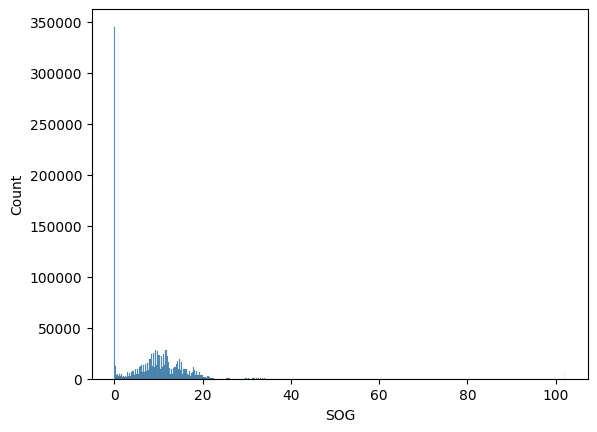

In [7]:
sns.histplot(data=data.SOG)

<Axes: xlabel='ROT', ylabel='Count'>

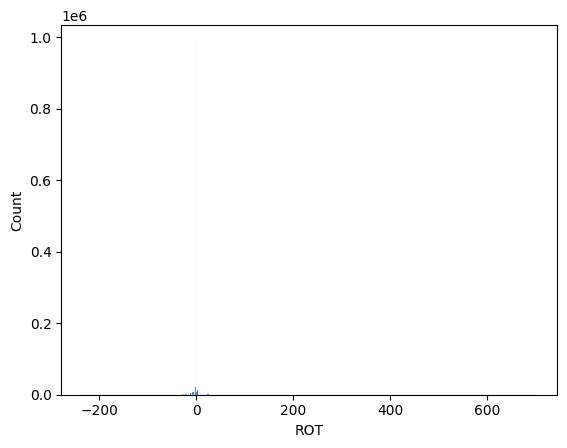

In [8]:
sns.histplot(data=data.ROT)

<Axes: xlabel='COG', ylabel='Count'>

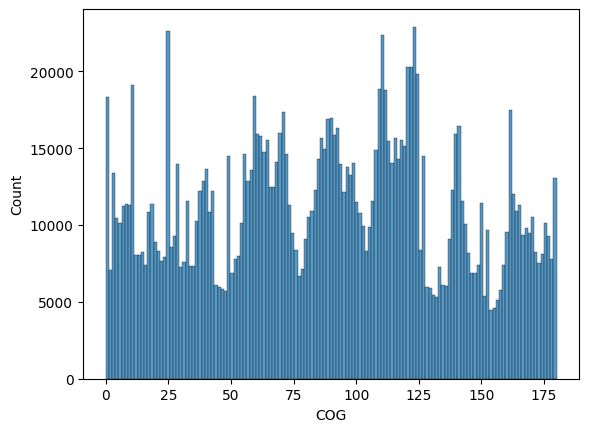

In [9]:
sns.histplot(data=data.COG)

In [10]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326"
)

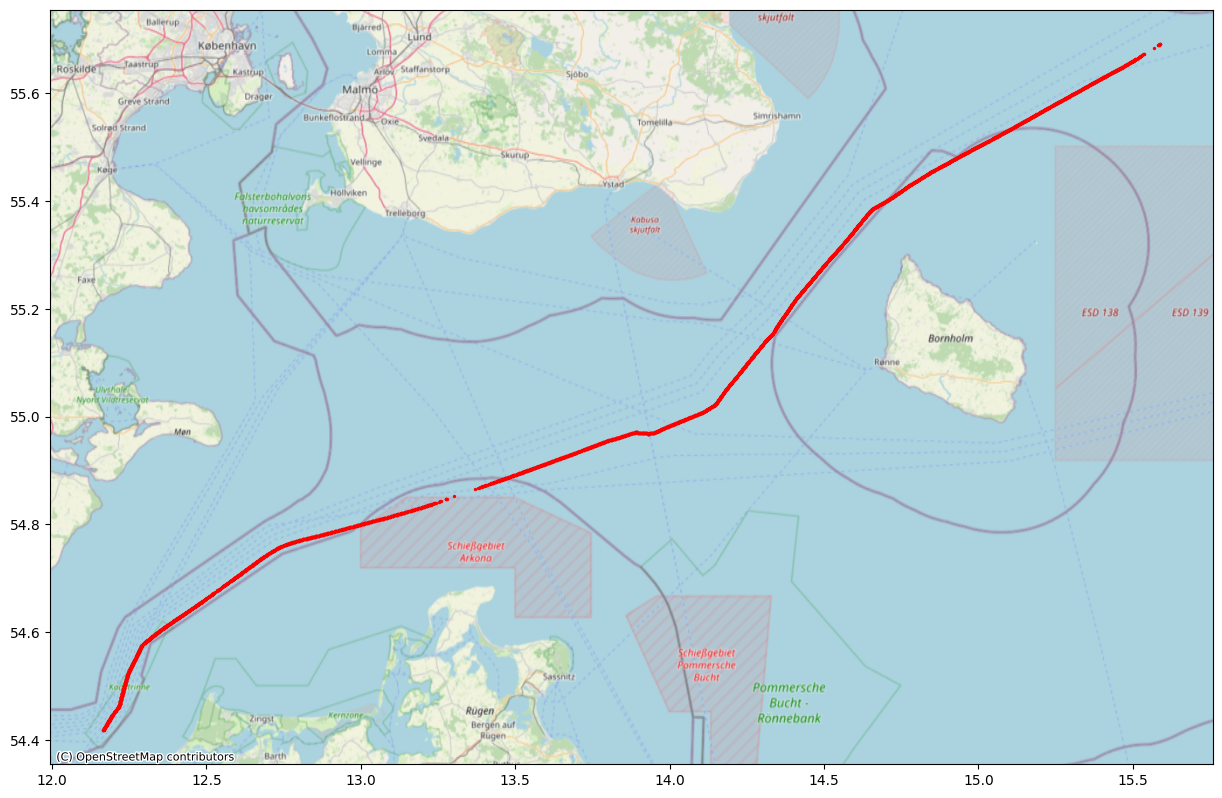

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

gdf[gdf.MMSI == 538007403].plot(ax=ax, markersize=2, color='red')

cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenStreetMap.Mapnik, zoom=9)

In [24]:
corr = data.select_dtypes(include=['float64']).corr(method='spearman')

In [25]:
corr

,Latitude,Longitude,ROT,SOG,COG,Heading
Latitude,1.000000,0.132702,-0.002542,-0.275066,0.014639,0.014639
Longitude,0.132702,1.000000,0.000034,-0.026392,-0.014992,-0.014992
ROT,-0.002542,0.000034,1.000000,-0.001729,-0.005235,-0.005235
SOG,-0.275066,-0.026392,-0.001729,1.000000,0.142481,0.142481
COG,0.014639,-0.014992,-0.005235,0.142481,1.000000,1.000000
Heading,0.014639,-0.014992,-0.005235,0.142481,1.000000,1.000000


<Axes: >

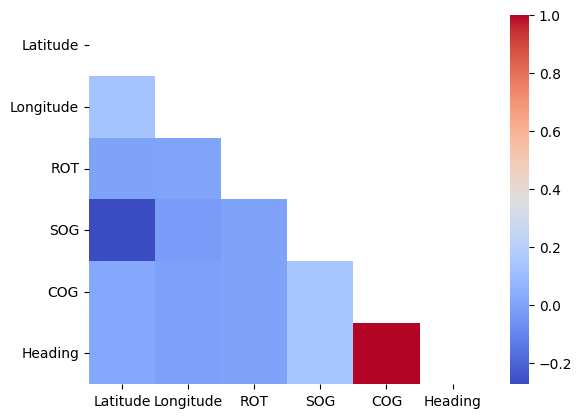

In [26]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            mask=mask,
            cmap='coolwarm',
            xticklabels=True,
            yticklabels=True)